# Notebook pour trouver les correlations dans le dataset

## Appel des librairies

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import du CSV

In [9]:
df = pd.read_csv('dataset-customer-review.csv')  # Example to read a CSV file

print(df.head())  # Display the first few rows of the dataframe

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

## Lien entre l'age et la note (rating)

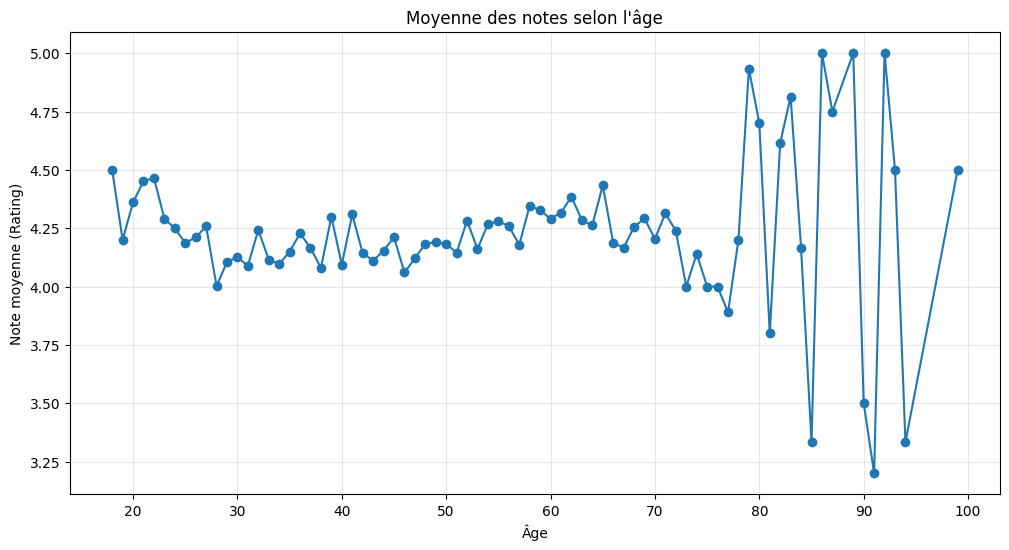

In [10]:
# Calculer la moyenne des notes selon l'âge
age_rating_mean = df.groupby('Age')['Rating'].mean()

# Afficher un graphique de la relation
plt.figure(figsize=(12, 6))
plt.plot(age_rating_mean.index, age_rating_mean.values, marker='o')
plt.xlabel('Âge')
plt.ylabel('Note moyenne (Rating)')
plt.title('Moyenne des notes selon l\'âge')
plt.grid(True, alpha=0.3)
plt.show()

## Observation
On voit qu'il n'y a pas de lien entre la note et l'age --> l'age n'est pas un élément utile du dataset

## Calcul du nombre de reco par rapport à la note

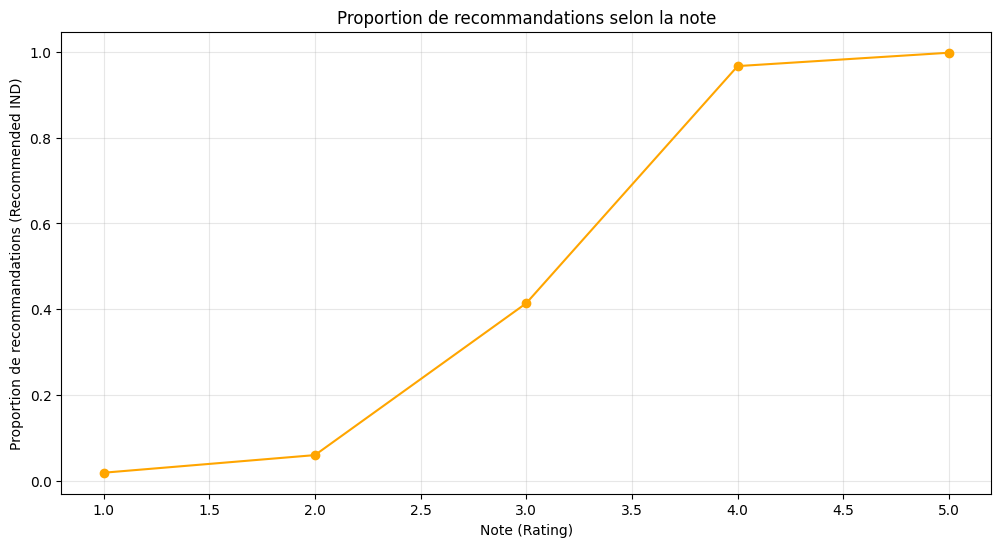

In [11]:
rating_reco_mean = df.groupby('Rating')['Recommended IND'].mean()

plt.figure(figsize=(12, 6))
plt.plot(rating_reco_mean.index, rating_reco_mean.values, marker='o', color='orange')
plt.xlabel('Note (Rating)')
plt.ylabel('Proportion de recommandations (Recommended IND)')
plt.title('Proportion de recommandations selon la note')
plt.grid(True, alpha=0.3)
plt.show() 

## Observation

On voit que quand la note est de 1 ou 2, le produit est très rarement reco alors que pour 4 et 5, il l'est très souvent.
On voit que quand la note est de 3, un produit est recommandé 40% du temps. C'est une valeur qui pourrait mettre dans le flou lors de l'entrainement du modele

## Nombre de feedback moyen par avis

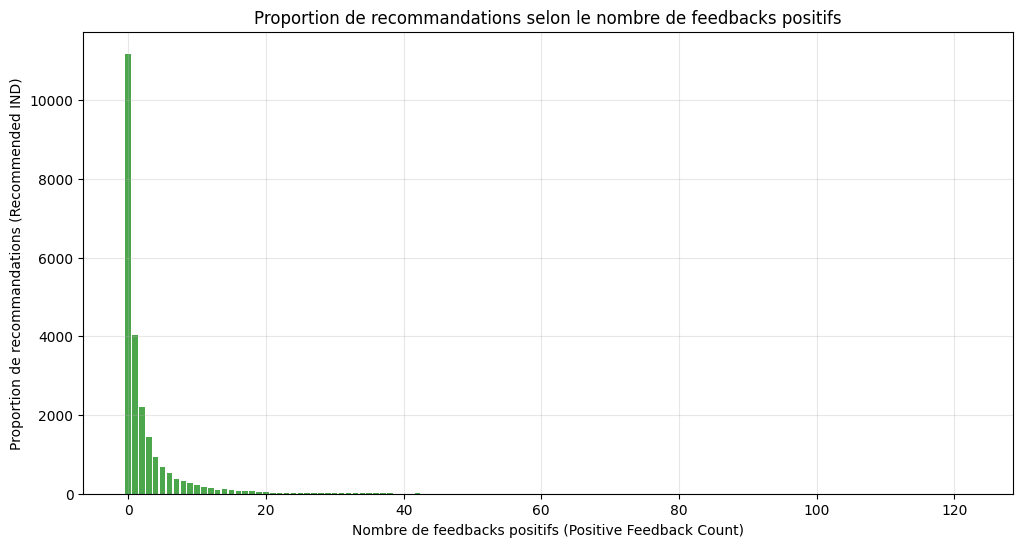

In [12]:
positiveFedback_review_mean = df['Positive Feedback Count'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(positiveFedback_review_mean.index, positiveFedback_review_mean.values, color='green', alpha=0.7)
plt.xlabel('Nombre de feedbacks positifs (Positive Feedback Count)')
plt.ylabel('Proportion de recommandations (Recommended IND)')
plt.title('Proportion de recommandations selon le nombre de feedbacks positifs')
plt.grid(True, alpha=0.3)
plt.show()

## Observation
Un grand nombre de produit n'ont pas de feedback positif (comme un like/upvote), un avis qui contient ces feedback aura donc un plus grand poids dans la décision


## Verification des titres / reviews vides

Nombre total d'avis: 23486
Nombre de titres vides/manquants: 3810 (16.2%)
Nombre de reviews vides/manquantes: 845 (3.6%)


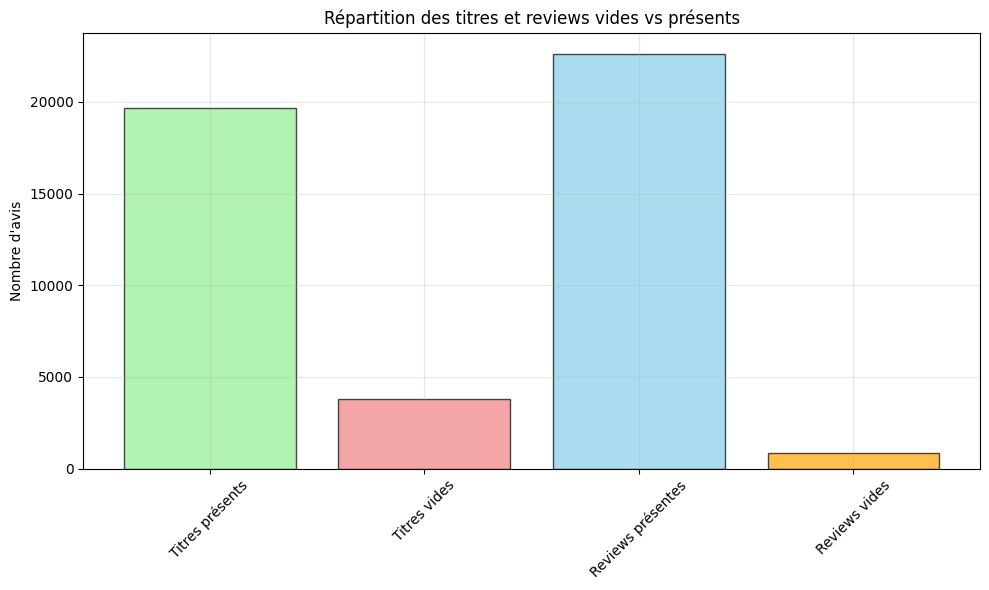

In [13]:
# Compter le nombre de titres et reviews vides/manquants
empty_titles = df['Title'].isna().sum()
empty_reviews = df['Review Text'].isna().sum()

total_rows = len(df)

print(f"Nombre total d'avis: {total_rows}")
print(f"Nombre de titres vides/manquants: {empty_titles} ({empty_titles/total_rows*100:.1f}%)")
print(f"Nombre de reviews vides/manquantes: {empty_reviews} ({empty_reviews/total_rows*100:.1f}%)")

# Visualisation
plt.figure(figsize=(10, 6))
categories = ['Titres présents', 'Titres vides', 'Reviews présentes', 'Reviews vides']
values = [total_rows - empty_titles, empty_titles, total_rows - empty_reviews, empty_reviews]
colors = ['lightgreen', 'lightcoral', 'skyblue', 'orange']

plt.bar(categories, values, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Nombre d\'avis')
plt.title('Répartition des titres et reviews vides vs présents')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Observation
on voit qu'il y a 3,6% des reviews qui manquent, ces données ne pourront pas être exploitées. Pour les titres, il y a 16,2% de titre absent, il faudra donc remplir par d'autres données ou trouver une facon de les ignorer

## Verification dse mots présetns dans les avis

In [14]:
from collections import Counter
import re

# Analyser les mots les plus fréquents pour identifier les mots parasites

# D'abord, créer word_counts à partir du dataset
all_text = []

# Combiner les titres et reviews (en ignorant les valeurs NaN)
for idx, row in df.iterrows():
    if pd.notna(row['Title']):
        all_text.append(str(row['Title']).lower())
    if pd.notna(row['Review Text']):
        all_text.append(str(row['Review Text']).lower())

# Extraire tous les mots et compter leur fréquence
all_words = []
for text in all_text:
    # Nettoyer le texte et extraire les mots
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    all_words.extend(words)

# Créer le compteur de mots
word_counts = Counter(all_words)

# Convertir word_counts en dictionnaire ordonné par fréquence
top_words = dict(word_counts.most_common())

# Créer une liste des mots parasites communs (stop words)
common_stop_words = {
    'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by',
    'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them',
    'my', 'your', 'his', 'her', 'its', 'our', 'their',
    'this', 'that', 'these', 'those',
    'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
    'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must',
    'not', 'yes', 'so',
    'up', 'down', 'out', 'off', 'over', 'again', 'further', 'then', 'once'
}

# Identifier les mots parasites dans le top des mots les plus fréquents
top_50_words = dict(list(top_words.items())[:50])
parasite_words_found = {}
content_words = {}

for word, count in top_50_words.items():
    if word.lower() in common_stop_words:
        parasite_words_found[word] = count
    else:
        content_words[word] = count

# Afficher les résultats
print("=== MOTS PARASITES IDENTIFIÉS DANS LE TOP 50 ===")
print(f"Nombre de mots parasites: {len(parasite_words_found)}")
for word, count in list(parasite_words_found.items())[:20]:  # Top 20 des mots parasites
    percentage = (count / sum(top_words.values())) * 100
    print(f"'{word}': {count:,} occurrences ({percentage:.2f}%)")

print(f"\n=== MOTS DE CONTENU DANS LE TOP 50 ===")
print(f"Nombre de mots de contenu: {len(content_words)}")
for word, count in list(content_words.items())[:15]:  # Top 15 des mots de contenu
    percentage = (count / sum(top_words.values())) * 100
    print(f"'{word}': {count:,} occurrences ({percentage:.2f}%)")

# Calculer le pourcentage total des mots parasites
total_parasite_count = sum(parasite_words_found.values())
total_word_count = sum(top_words.values())
parasite_percentage = (total_parasite_count / total_word_count) * 100

print(f"\n=== STATISTIQUES GLOBALES ===")
print(f"Total des occurrences de mots parasites: {total_parasite_count:,}")
print(f"Pourcentage des mots parasites: {parasite_percentage:.2f}%")

=== MOTS PARASITES IDENTIFIÉS DANS LE TOP 50 ===
Nombre de mots parasites: 30
'the': 77,214 occurrences (5.37%)
'i': 67,539 occurrences (4.69%)
'and': 50,852 occurrences (3.53%)
'it': 50,034 occurrences (3.48%)
'a': 43,974 occurrences (3.06%)
'is': 30,988 occurrences (2.15%)
'this': 26,693 occurrences (1.86%)
'to': 25,159 occurrences (1.75%)
'in': 21,313 occurrences (1.48%)
'but': 18,130 occurrences (1.26%)
'on': 15,679 occurrences (1.09%)
'for': 15,114 occurrences (1.05%)
'of': 13,695 occurrences (0.95%)
'with': 13,105 occurrences (0.91%)
'so': 12,703 occurrences (0.88%)
'was': 12,293 occurrences (0.85%)
'my': 11,287 occurrences (0.78%)
'not': 10,791 occurrences (0.75%)
'that': 10,071 occurrences (0.70%)
'have': 8,157 occurrences (0.57%)

=== MOTS DE CONTENU DANS LE TOP 50 ===
Nombre de mots de contenu: 20
'dress': 12,221 occurrences (0.85%)
'love': 10,819 occurrences (0.75%)
't': 9,196 occurrences (0.64%)
's': 9,030 occurrences (0.63%)
'size': 8,976 occurrences (0.62%)
'very': 8,857 

## Observation
On voit qu'il y a 40% des reviews qui contiennent des mots parasites, il audra donc les retirer lors du traitement des données

# Conclusion

On a pu voir que dans ce dataset 
- Beaucoup de mots parasites dans les reviews (à supprimer)
- Les avis moyens (à 3 étoiles) pourrait fausser les résultats car trop incertains (ne seront pas pris en compte)
- Les avis ayant des feedback positif auront un plus gros poid dans les décisions du model
- certainnes données n'ont aucune influence : cloth ID, Age, Recommended IND
- Pour les Divisons, Departement et Name des produits, il faudra voir avec les itérations si ces valeurs ont une influence ou non